In [ ]:
# Install packages
%pip install networkx
%pip install numpy
%pip install tqdm
%pip install matplotlib

In [731]:
# For sdp_algorithm

# %pip install cmake
# %pip install ecos==2.0.5
# %pip install cvxpy

In [732]:
from starter import *
from greedy_algorithm import *
from k_cut_algorithm import *
from simulated_annealing import *
import random

In [733]:
import importlib
import starter
import greedy_algorithm
import k_cut_algorithm
import simulated_annealing
importlib.reload(starter)
importlib.reload(greedy_algorithm)
importlib.reload(k_cut_algorithm)
importlib.reload(simulated_annealing)
from starter import *
from greedy_algorithm import *
from k_cut_algorithm import *
from simulated_annealing import *

In [734]:
#import sdp_algorithm
#importlib.reload(sdp_algorithm)
#from sdp_algorithm import *

# Phase 1 - Create Inputs

In [735]:
# Add edges with G.add_edge(u, v, weight=w)
# Idea: consider making the inputs with a solution in mind, 
# such that you know the solution when the outputs are released

def small(G: nx.Graph):
    # Each even node connects to each odd node, with 'random' weight
    # Optimal Solution: Partition into odd and even teams
    for i in range(100):
        for j in range(i + 1, (100 - i) // 2):
            G.add_edge(i, i + 2 * j, weight=min(int(math.sin(i + j) * 500 + 850), int(math.cos(2 * j + i) * 500 + 850), 1000))
    
def medium(G: nx.Graph):
    # Each node connects to its first 20 multiples, with the closer multiples having larger weights
    # Optimal Solution: Partition such that co-primeness between groups are maximized
    for i in range(300):
        for j in range(20):
            if i != (i * j) % 300:
                G.add_edge(i, (i * j) % 300, weight=40 * (20 - j + 1))
    
def large(G: nx.Graph):
    # Completely random graph, where each node has between 5 and 15 edges, to any other node with random weight
    # Optimal Solution: Unknown
    for i in range(1000):
        for _ in range(random.randint(5, 15)):
            j = random.randint(1, 999)
            if i != j:
                G.add_edge(i, j, weight=random.randint(1, 1000))

# Phase 2 - Implement your Solver

In [736]:
def random_solve(G: nx.Graph):
    """Randomly partitions G into a random number of teams."""
    k = random.randint(5, 10)
    max_per_team = len(G.nodes) / k
    teams = [0 for _ in range(k)]
    for v in G.nodes:
        look_for_team = True
        while look_for_team:
            this_team = random.randint(1, k)
            if teams[this_team - 1] < max_per_team:
                G.nodes[v]['team'] = this_team
                teams[this_team - 1] += 1
                look_for_team = False

In [737]:
def current_solve(in_file):
    def current_solve_helper(G: nx.Graph):
        file_name = in_file[in_file.index("/") + 1:]
        file_name = file_name[:file_name.index("in")]
        instance = read_input(in_file)
        current_solution = read_output(instance, "outputs" + "/" + file_name + "out")
        for v in G.nodes:
            G.nodes[v]['team'] = current_solution.nodes[v]['team']
    return current_solve_helper

In [738]:
def solve(G: nx.Graph):
    
    # TODO: Simulated Annealing
        # TODO: Try updating specific nodes, and seeing which changes to make based on homework 11 algorithm
        # TODO: Decrease the amount of nodes updated as time goes on
        # TODO: Do these steps for k-1, k, and k+1, pick the best

    k = optimize_k(G)
    G = max_k_cut_solve(k)(G)

[503, 5] -4484.8181633908
[724, 5] -3667.7082912889
[559, 5] -3135.7996985425
[70, 5] -2371.3021226336
[927, 5] -1990.5182543951
[44, 5] -1578.5195629609
[194, 5] -980.6876353876
[61, 5] -657.0528022732
[969, 4] -862.4714237639
[486, 5] -614.450280454
[640, 4] -666.4604378174
[695, 5] -598.7183088365
[432, 4] -629.5685939036
[554, 5] -578.4314060964
[290, 4] -594.5685939036
[920, 5] -540.4314060964
[226, 4] -506.5685939036
[879, 5] -516.4314060964
[98, 5] -205.9809064738
[84, 4] -468.0190935262
[541, 5] -200.1185420036
[813, 4] -225.9224346624
[909, 5] -176.0775653376
[547, 4] -165.3568485553
[770, 4] -123.6582696572
[652, 4] -102.8138185429
[686, 4] -61.5860391117
[162, 4] -41.0148078316
-26745.055307447066


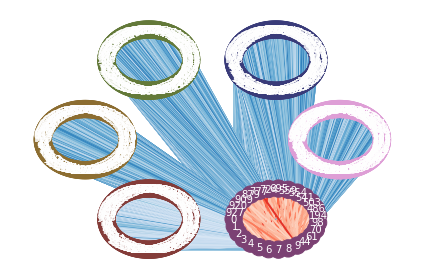

current_solve_helper 124994.60894290113


In [745]:
# TODO: Write a function that fetches a random input to test on

import greedy_algorithm
importlib.reload(greedy_algorithm)
from greedy_algorithm import *

#large189

#large 223, 240 (not working)

input = 'inputs/large240.in'

solvers = [current_solve(input)]

for solver in solvers:
    G = read_input(input)

    k = solver(G)

    initial_score = score(G)


    bucket = Bucket_Structure(G.copy())

    total_gains = 0

    # print(bucket.buckets)

    for _ in range(300):
        move, gain = O1_operator(bucket)

        if gain < 0:
            print(move, gain)

            total_gains += gain

            G.nodes[move[0]]['team'] = move[1]

            # current_score = score(G)
            # print(current_score - initial_score)

            bucket = Bucket_Structure(G)
            #bucket.update(move)

    #print(total_gains)

    current_score = score(G)
    print(current_score - initial_score)
    
    validate_output(G)
    visualize(G)
    print(solver.__name__, score(G))


In [ ]:
# We can use this to upper-bound the number of teams by looking at the leaderboard.
# Maybe not that useful, but could be interesting

for k in range(2, 18):
    print(k, K_COEFFICIENT * math.exp(K_EXP * k))

In [ ]:
run(greedy_algorithm, 'inputs/large48.in', 'outputs/large48.out')

In [ ]:
# TODO: Write a function that can separate which inputs to run, given a class (small, medium, large) and range of numbers

run_all(greedy_algorithm, 'inputs', 'outputs')

In [ ]:
tar('outputs', True)